# Campanha segmentada de clientes

### [Danilo Gustavo Bispo]

## Conteúdo

1. [Introdução](#Introdução)

2. [Licença](#Licença)

3. [A problematização de negócio](#A-problematização-de-negócio)

4. [Checando os dados](#Checando-os-dados)

5. [Análise exploratória](#Análise-exploratória)

6. [Limpeza dos dados](#Limpeza-dos-dados)

7. [Criação do modelo](#Criação-do-modelo)

## Introdução

[[ voltar_ao topo ]](#Conteúdo)

Neste notebook será apresentado um pipeline básico de análise de dados no intuito de representar um típico workflow de projeto em ciência de dados.

Além de oferecer o código, a idéia é demonstrar um conjunto de boas práticas na tentativa de tornar o exemplo mais eficaz e colaborativo junto à comunidade de cientistas de dados. 

Será seguido o checklist do livro [The Elements of Data Analytic Style](https://leanpub.com/datastyle). Um guia rápido e gratuito para realização de análises de dados.

## Licença

[[ voltar ao topo ]](#Conteúdo)

No geral este material está disponibilizado para que seja utilizado e compartilhado de maneira plena.

## A problematização de negócio

[[ voltar ao topo ]](#Conteúdo)


Uma financeira pensando em lançar uma campanha mais direcionada para seus clientes, solicitou uma demanda ao departamento de marketing.

Ao entender o cliente, os profissionais de propaganda podem lançar uma campanha adaptada às necessidades específicas. Neste caso a equipe quer lançar uma campanha de marketing dividindo seus clientes alvos em três grupos distintos.


Visto que a companhia possui grande disponibilidade de dados sobre os clientes, a ideia do projeto consiste análisar e explorar esses dados na eminência de obter informações relaventes que permitam criar modelos de machine learning que possam ser aplicados para auxiliar na segmentação de clientes.


O princial objetivo deste projeto será responder a seguintes questões:

* Como são os padrões de uso em relação a compras específicas e como isso se traduz em potenciais agrupamentos para clientes?
* É possível integrar variáveis e esses padrões de compra em um algoritmo que seja capaz de indicar grupos específicos de clientes para auxiliar na criação de campanhas? Se sim, qual forma e estrutura este algoritmo deve assumir?

Para isso foi realizado as seguintes abordagens:

Iniciei o estudo realizando uma série de análises exploratórias no intuito de reconhecer como diferentes variáveis poderiam estar correlacionadas ou associadas uma à outra. Tais análises revelaram padrões importantes sobre comportamento de compras dos clientes. 

As informações adquiridas durante a fase de exploração possibilitaram a utilização das técnicas não supervisionado de agrupamento e análise de componentes principais para uma melhor segmentação dos grupos. 

## Checando os dados

[[ voltar ao topo ]](#Conteúdo)

O próximo passo consiste em lançar uma visão sobre os dados com os quais se pretende trabalhar. Considerando que por mais aparentemente acurado os dados possam parecer estar, eles podem conter erros, portanto torna-se importante pontuar os erros antes de iniciar o processo de análise.

Por exemplo, as considerações servem para responder as seguintes questões:

* Existe algo de errado com os dados?
* Existe alguma peculiaridade com os dados?
* Será preciso corrigir ou remover algo relacionado aos dados?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
transacoescliente_df = pd.read_csv('TransacoesClientes.csv')
transacoescliente_df.head()

,ID_CLIENTE,SALDO,FREQUENCIA_SALDO,COMPRAS,COMPRAS_AVISTA,VALOR_COMPRAS_PARCELADO,VALOR_ADIANTADO,FREQUENCIA_COMPRAS,FREQUENCIA_COMPRAS_AVISTA,FREQUENCIA_COMPRAS_PARCELADO,FREQUENCIA_PAGTOS_ADIANTAMENTO,TRANSACOES_ADIANTAMENTO,TRANSACOES_COMPRA,LIMITE_CREDITO,PAGAMENTOS,PAGAMENTOS_MINIMOS,PERC_PGTOS_TOTAL,TEMPO_CARTAO
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
transacoescliente_df.info()
# 18 features com 8950 datapoints  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
ID_CLIENTE                        8950 non-null object
SALDO                             8950 non-null float64
FREQUENCIA_SALDO                  8950 non-null float64
COMPRAS                           8950 non-null float64
COMPRAS_AVISTA                    8950 non-null float64
VALOR_COMPRAS_PARCELADO           8950 non-null float64
VALOR_ADIANTADO                   8950 non-null float64
FREQUENCIA_COMPRAS                8950 non-null float64
FREQUENCIA_COMPRAS_AVISTA         8950 non-null float64
FREQUENCIA_COMPRAS_PARCELADO      8950 non-null float64
FREQUENCIA_PAGTOS_ADIANTAMENTO    8950 non-null float64
TRANSACOES_ADIANTAMENTO           8950 non-null int64
TRANSACOES_COMPRA                 8950 non-null int64
LIMITE_CREDITO                    8949 non-null float64
PAGAMENTOS                        8950 non-null float64
PAGAMENTOS_MINIMOS                8637 non-null float64
PE

In [4]:
transacoescliente_df.describe()
# alguns valores pertinentes media
# saldo: 1564
# frequencia de atualizaca de saldo: 0.87
# valores de compras: 1000
# valores de compras a vista: ~600
# frequencia de compras: .49
# limite de crédito ~4500
# percentual de pagamento total 15%
# tempo de cartao 11 anos

,SALDO,FREQUENCIA_SALDO,COMPRAS,COMPRAS_AVISTA,VALOR_COMPRAS_PARCELADO,VALOR_ADIANTADO,FREQUENCIA_COMPRAS,FREQUENCIA_COMPRAS_AVISTA,FREQUENCIA_COMPRAS_PARCELADO,FREQUENCIA_PAGTOS_ADIANTAMENTO,TRANSACOES_ADIANTAMENTO,TRANSACOES_COMPRA,LIMITE_CREDITO,PAGAMENTOS,PAGAMENTOS_MINIMOS,PERC_PGTOS_TOTAL,TEMPO_CARTAO
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# Verificando se alguém fez uma compra única no valor de 40761
transacoescliente_df[transacoescliente_df['COMPRAS_AVISTA'] == 40761.25]


,ID_CLIENTE,SALDO,FREQUENCIA_SALDO,COMPRAS,COMPRAS_AVISTA,VALOR_COMPRAS_PARCELADO,VALOR_ADIANTADO,FREQUENCIA_COMPRAS,FREQUENCIA_COMPRAS_AVISTA,FREQUENCIA_COMPRAS_PARCELADO,FREQUENCIA_PAGTOS_ADIANTAMENTO,TRANSACOES_ADIANTAMENTO,TRANSACOES_COMPRA,LIMITE_CREDITO,PAGAMENTOS,PAGAMENTOS_MINIMOS,PERC_PGTOS_TOTAL,TEMPO_CARTAO
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
transacoescliente_df['VALOR_ADIANTADO'].max()

47137.211760000006

In [7]:
# Verificando quem fez um adiantamento no valor de 47137
# Este cliente fez 123 transações de adiantamento em dinheiro
# Cartão de crédito nunca pago integralmente

transacoescliente_df[transacoescliente_df['VALOR_ADIANTADO'] == 47137.211760000006]

,ID_CLIENTE,SALDO,FREQUENCIA_SALDO,COMPRAS,COMPRAS_AVISTA,VALOR_COMPRAS_PARCELADO,VALOR_ADIANTADO,FREQUENCIA_COMPRAS,FREQUENCIA_COMPRAS_AVISTA,FREQUENCIA_COMPRAS_PARCELADO,FREQUENCIA_PAGTOS_ADIANTAMENTO,TRANSACOES_ADIANTAMENTO,TRANSACOES_COMPRA,LIMITE_CREDITO,PAGAMENTOS,PAGAMENTOS_MINIMOS,PERC_PGTOS_TOTAL,TEMPO_CARTAO
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


## Análise exploratória

[[ voltar ao topo ]](#Conteúdo)


A análise exploratória é a etapa em que podemos começar a nos aprofundar no conjunto de dados, além dos erros e discrepâncias. Procuraremos responder a perguntas como:

* Como os dados estão distribuídos?

* Existem correlações nos dados?

* Existem fatores de confusão que explicam essas correlações?


Este é o estágio em que plotamos todos os dados, mas não se preocupando com o visual, pois esses gráficos são para uso técnico analítico.

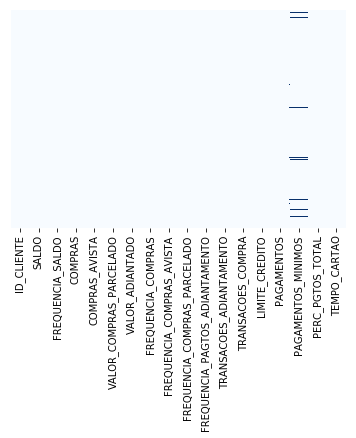

In [8]:
# Verificando a ocorrência de informações faltantes
sns.heatmap(transacoescliente_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [9]:
transacoescliente_df.isnull().sum()

ID_CLIENTE                          0
SALDO                               0
FREQUENCIA_SALDO                    0
COMPRAS                             0
COMPRAS_AVISTA                      0
VALOR_COMPRAS_PARCELADO             0
VALOR_ADIANTADO                     0
FREQUENCIA_COMPRAS                  0
FREQUENCIA_COMPRAS_AVISTA           0
FREQUENCIA_COMPRAS_PARCELADO        0
FREQUENCIA_PAGTOS_ADIANTAMENTO      0
TRANSACOES_ADIANTAMENTO             0
TRANSACOES_COMPRA                   0
LIMITE_CREDITO                      1
PAGAMENTOS                          0
PAGAMENTOS_MINIMOS                313
PERC_PGTOS_TOTAL                    0
TEMPO_CARTAO                        0
dtype: int64

In [10]:
# Preenchendo os elementos ausentes com a média de 'PAGAMENTOS_MINIMOS'
transacoescliente_df.loc[(transacoescliente_df['PAGAMENTOS_MINIMOS'].isnull() == True), 'PAGAMENTOS_MINIMOS'] = transacoescliente_df['PAGAMENTOS_MINIMOS'].mean()

In [11]:
# Preenchendo os elementos ausentes com a média da features 'LIMITE_CREDITO'
transacoescliente_df.loc[(transacoescliente_df['LIMITE_CREDITO'].isnull() == True), 'LIMITE_CREDITO'] = transacoescliente_df['LIMITE_CREDITO'].mean()

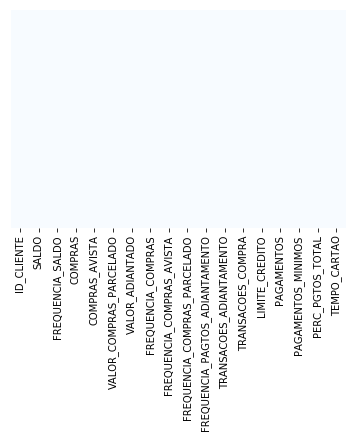

In [12]:
 sns.heatmap(transacoescliente_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [13]:
# Verificando entradas duplicadas
transacoescliente_df.duplicated().sum()

0

In [14]:
# Aqui vamos remover ID_CLIENTE pois não possui significado neste contexto
transacoescliente_df.drop("ID_CLIENTE", axis = 1, inplace= True)

In [15]:
transacoescliente_df.head()

,SALDO,FREQUENCIA_SALDO,COMPRAS,COMPRAS_AVISTA,VALOR_COMPRAS_PARCELADO,VALOR_ADIANTADO,FREQUENCIA_COMPRAS,FREQUENCIA_COMPRAS_AVISTA,FREQUENCIA_COMPRAS_PARCELADO,FREQUENCIA_PAGTOS_ADIANTAMENTO,TRANSACOES_ADIANTAMENTO,TRANSACOES_COMPRA,LIMITE_CREDITO,PAGAMENTOS,PAGAMENTOS_MINIMOS,PERC_PGTOS_TOTAL,TEMPO_CARTAO
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
n = len(transacoescliente_df.columns)
n

17

In [17]:
transacoescliente_df.columns

Index(['SALDO', 'FREQUENCIA_SALDO', 'COMPRAS', 'COMPRAS_AVISTA',
       'VALOR_COMPRAS_PARCELADO', 'VALOR_ADIANTADO', 'FREQUENCIA_COMPRAS',
       'FREQUENCIA_COMPRAS_AVISTA', 'FREQUENCIA_COMPRAS_PARCELADO',
       'FREQUENCIA_PAGTOS_ADIANTAMENTO', 'TRANSACOES_ADIANTAMENTO',
       'TRANSACOES_COMPRA', 'LIMITE_CREDITO', 'PAGAMENTOS',
       'PAGAMENTOS_MINIMOS', 'PERC_PGTOS_TOTAL', 'TEMPO_CARTAO'],
      dtype='object')

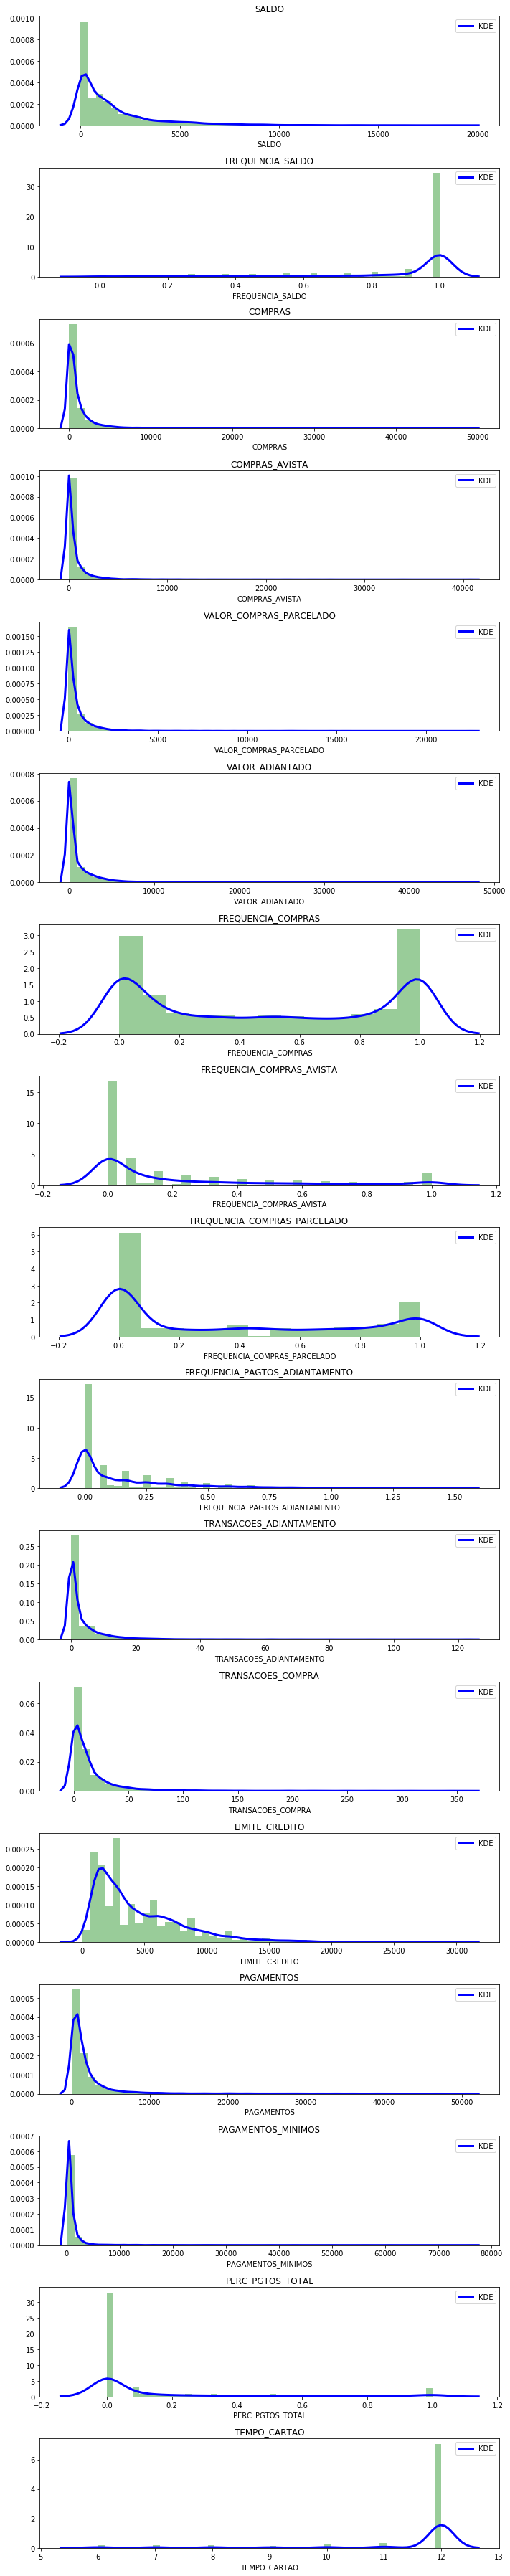

In [18]:
# utilizando distplot para combinar as funções do matplotlib.hist com a kdeplot() do seaborn
# KDE é utilizado para visualizar função densidade de probabilidade de variáveis contínuas

#import warnings
#warnings.filterwarnings("ignore", category=UserWarning)

plt.figure(figsize=(10,50))
for i in range(len(transacoescliente_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(transacoescliente_df[transacoescliente_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(transacoescliente_df.columns[i])

plt.tight_layout()

#### Aqui vale algumas observações sobre as seguintes features 

* A média do saldo é de: 1500
* A atualização frenquente de saldo para a maioria dos clientes é ~1
* Para frenquencia de compras existem dois grupos distintos de clientes
* A maioria dos clientes não fazem compras pontuais nem compras parceladas com muita frequencia
* Um número muito pequeno de clientes paga com o saldo total ~0
* Média do limite de crédito está em torno dos 4500
* A maioria dos clientes estão com tempo médio de adesão do cartão de ~11 anos 

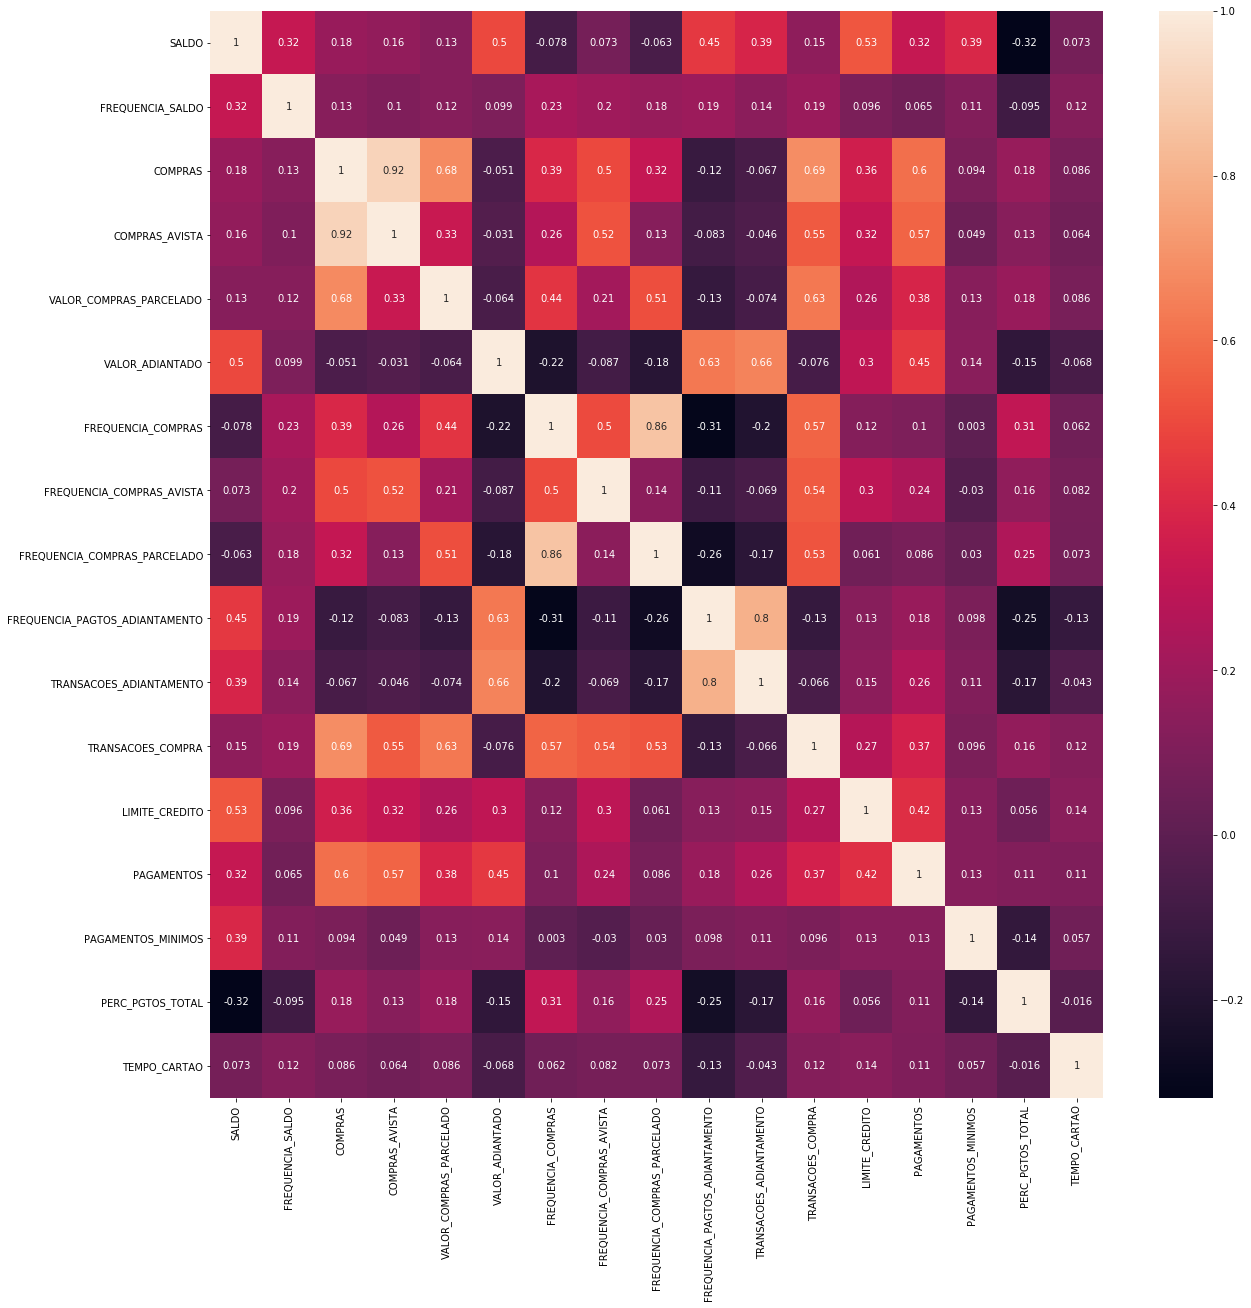

In [19]:
correlacoes = transacoescliente_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlacoes, annot = True)

#### O mapa com as correlações demonstra o que já haviamos desconfiado:
    
* Compras está fortemente correlacionada com compra avista, parceladas, transações de compra, limite de crédito e pagamentos
* Forte correlação entre frequencia de compra e frequencia de compra e compras parceladas

## Criação do modelo

[[ voltar ao topo ]](#Conteúdo)



Após assegurar que os dados estejam limpos e embuído com algum tipo de conhecimento mesmo que superficial sobre suas distribuições e relações, chegou o momento de dar o próximo passo iniciando o processo de criação do modelo.

Nesta seção, exploraremos os modelos de técnicas K-means com método Elbow para seleção do melhor número de clusters. Aplicaremos método de redes neurais Auto encoders para tentar obter uma melhor compactação dos dados.

Por fim será utilizado análise de componente principal para redução de dimensionalidade a fim propor as melhores segmentações para o grupo de clientes.


#### Selecionando o número de clusters com auxílio do método Elbow

- Elbow é um método heurístico de interpretação e validação de consistência na análise de cluster projetada para ajudar a encontrar o número apropriado de clusters em um conjunto de dados. 
- Intuitivamente devemos pensar no gráfico como um desenho de um braço de ser humano, o datapoint que se encontra no cotovelo é o valor k que melhor representa o número de cluster que precisaremos utilizar
- Fonte: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [20]:
# Escalando os dados para melhorar a normalização dos dados
scaler = StandardScaler()
transacoescliente_df_scaled = scaler.fit_transform(transacoescliente_df)

In [21]:
transacoescliente_df_scaled.shape

(8950, 17)

In [22]:
transacoescliente_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

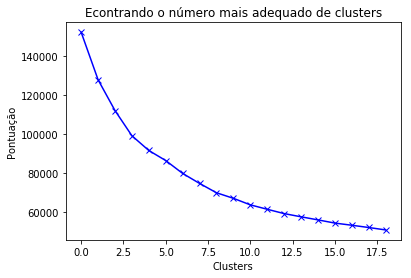

In [23]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(transacoescliente_df_scaled)
  scores_1.append(kmeans.inertia_) 

plt.plot(scores_1, 'bx-')
plt.title('Econtrando o número mais adequado de clusters')
plt.xlabel('Clusters')
plt.ylabel('Pontuação') 
plt.show()

Pode-se observar acima que a partir do quarto cluster o cotovelo da curva começa a se formar, no entanto, os valores não reduzem linearmente até o 8º cluster.

#### Aplicação do método K-Means

Para este projeto vamos selecionar o número 8 como o valor representante.

In [24]:
kmeans = KMeans(8)
kmeans.fit(transacoescliente_df_scaled)
labels = kmeans.labels_

In [25]:
kmeans.cluster_centers_.shape

(8, 17)

In [26]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [transacoescliente_df.columns])
cluster_centers           

,SALDO,FREQUENCIA_SALDO,COMPRAS,COMPRAS_AVISTA,VALOR_COMPRAS_PARCELADO,VALOR_ADIANTADO,FREQUENCIA_COMPRAS,FREQUENCIA_COMPRAS_AVISTA,FREQUENCIA_COMPRAS_PARCELADO,FREQUENCIA_PAGTOS_ADIANTAMENTO,TRANSACOES_ADIANTAMENTO,TRANSACOES_COMPRA,LIMITE_CREDITO,PAGAMENTOS,PAGAMENTOS_MINIMOS,PERC_PGTOS_TOTAL,TEMPO_CARTAO
0,0.011786,0.403919,-0.356726,-0.241283,-0.400083,-0.096370,-0.852704,-0.394566,-0.754170,0.101819,-0.029537,-0.481178,-0.302976,-0.250827,-0.011950,-0.455646,0.273759
1,-0.360867,0.332604,-0.034455,-0.241543,0.362098,-0.362446,0.992239,-0.381451,1.203543,-0.473330,-0.359899,0.189193,-0.260098,-0.213994,-0.030676,0.312496,0.256465
2,1.689445,0.393453,-0.219506,-0.157954,-0.228899,2.003448,-0.472500,-0.208168,-0.411887,1.907412,1.912834,-0.268062,1.032291,0.815783,0.552185,-0.390999,0.069801
3,-0.701251,-2.141884,-0.310520,-0.235029,-0.302316,-0.322150,-0.555316,-0.442677,-0.440150,-0.521105,-0.376272,-0.419502,-0.175348,-0.202111,-0.256754,0.281920,0.198841
4,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
5,1.042612,0.464077,2.512455,1.825371,2.587167,-0.136461,1.162760,1.561373,1.268890,-0.274246,-0.137720,3.127227,1.311133,1.470507,0.559015,0.254605,0.337591
6,-0.141846,0.400079,0.542119,0.671796,0.047442,-0.330876,0.982752,1.911102,0.170298,-0.412449,-0.329534,0.622167,0.424233,0.144491,-0.159765,0.450271,0.269030
7,-0.336228,-0.347383,-0.287908,-0.214195,-0.286875,0.067425,-0.201713,-0.285924,-0.224146,0.307084,0.000231,-0.387540,-0.563820,-0.392784,-0.209266,0.014243,-3.202809


In [27]:
# Para entender o que esses números significam, vale realizar uma transformação inversa
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [transacoescliente_df.columns])
cluster_centers

,SALDO,FREQUENCIA_SALDO,COMPRAS,COMPRAS_AVISTA,VALOR_COMPRAS_PARCELADO,VALOR_ADIANTADO,FREQUENCIA_COMPRAS,FREQUENCIA_COMPRAS_AVISTA,FREQUENCIA_COMPRAS_PARCELADO,FREQUENCIA_PAGTOS_ADIANTAMENTO,TRANSACOES_ADIANTAMENTO,TRANSACOES_COMPRA,LIMITE_CREDITO,PAGAMENTOS,PAGAMENTOS_MINIMOS,PERC_PGTOS_TOTAL,TEMPO_CARTAO
0,1589.006905,0.972955,241.054406,191.956688,49.277608,776.777849,0.148119,0.084751,0.064711,0.155519,3.047256,2.749546,3392.099842,1007.025209,836.356800,0.020446,11.883679
1,813.360817,0.956062,929.592132,191.525282,738.508630,218.805515,0.888584,0.088664,0.842756,0.040426,0.792779,19.412463,3548.105936,1113.652741,792.718073,0.245114,11.860534
2,5080.911310,0.970476,534.227340,330.266450,204.076952,5180.194563,0.300714,0.140357,0.200743,0.516837,16.302511,8.046804,8250.347655,4094.756294,2151.050978,0.039354,11.610731
3,104.879787,0.369878,339.774078,202.337758,137.687420,303.307732,0.267475,0.070399,0.189510,0.030866,0.681049,4.282572,3856.463151,1148.051951,265.852622,0.236172,11.783418
4,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
5,3734.584707,0.987206,6371.104410,3622.178904,2750.610899,692.706119,0.957022,0.668246,0.868727,0.080265,2.308989,92.441011,9264.887640,5990.116797,2166.966836,0.228182,11.969101
6,1269.234648,0.972046,2161.450242,1707.481101,453.969141,285.009270,0.884777,0.772577,0.432118,0.052609,1.000000,30.174575,6037.983234,2151.432188,491.881582,0.285411,11.877350
7,864.645308,0.794979,388.085586,236.917416,151.649711,1120.263874,0.409393,0.117161,0.275356,0.196595,3.250401,5.077047,2443.040850,596.072587,376.521919,0.157880,7.231140


Vale comentar sobre as observações de alguns clusters

* Primeiro cluster (Transações): clientes que pagam menos juros e são cuidadosos com seu dinheiro, Cluster com menor saldo (104) e entrada (303), percentual de pagamento total = 23%
* Segundo cluster (Gatilhos): clientes que utilizam cartão de crédito como empréstimo (setor mais lucrativo): saldo mais alto (5000) e entrada (~5000), baixa frequência de compra, alta frequência de adiantamento em dinheiro (0.5), transações com alto adiantamento em dinheiro (16) e baixo percentual de pagamento à vista (3%)
* Terceiro cluster (VIP/Prime): limite de crédito alto (16000) e percentual mais alta de pagamento total, meta para aumentar o limite de crédito e aumentar os hábitos de compras
* Quarto cluster (Tempo de Adesão): clientes com baixo tempo de adesao (7 anos) e baixo saldo

In [28]:
labels.shape # Labels relacionados a cada data point

(8950,)

In [29]:
labels.max()

7

In [30]:
labels.min()

0

In [31]:
y_kmeans = kmeans.fit_predict(transacoescliente_df_scaled)
y_kmeans

array([6, 2, 0, ..., 4, 4, 4], dtype=int32)

In [32]:
# concatenando os cluster label com o dataframe original
transacoescliente_df_cluster = pd.concat([transacoescliente_df, pd.DataFrame({'cluster':labels})], axis = 1)
transacoescliente_df_cluster.head()

,SALDO,FREQUENCIA_SALDO,COMPRAS,COMPRAS_AVISTA,VALOR_COMPRAS_PARCELADO,VALOR_ADIANTADO,FREQUENCIA_COMPRAS,FREQUENCIA_COMPRAS_AVISTA,FREQUENCIA_COMPRAS_PARCELADO,FREQUENCIA_PAGTOS_ADIANTAMENTO,TRANSACOES_ADIANTAMENTO,TRANSACOES_COMPRA,LIMITE_CREDITO,PAGAMENTOS,PAGAMENTOS_MINIMOS,PERC_PGTOS_TOTAL,TEMPO_CARTAO,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


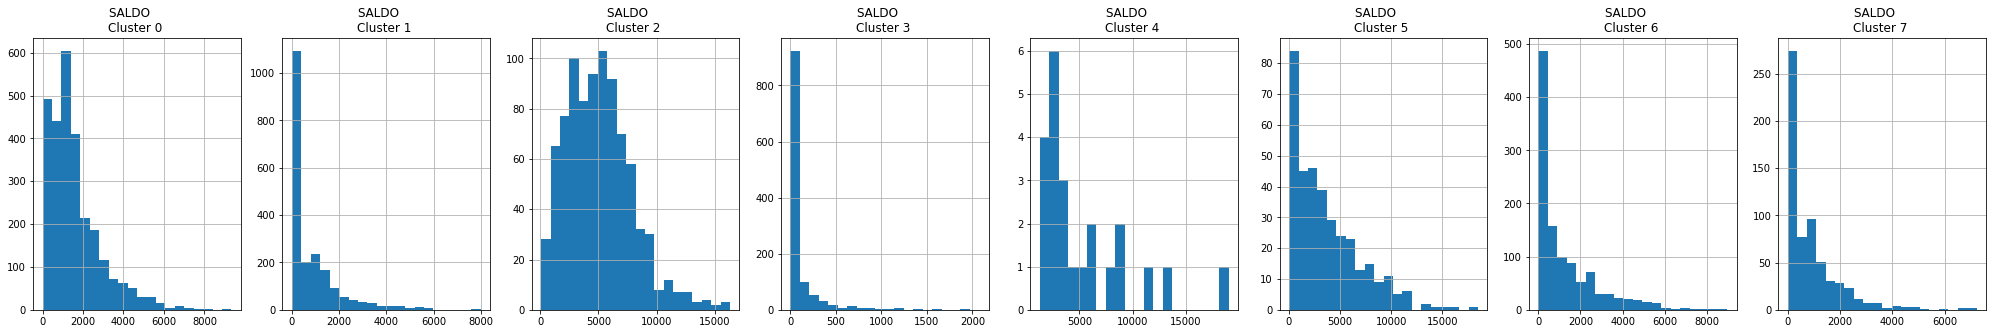

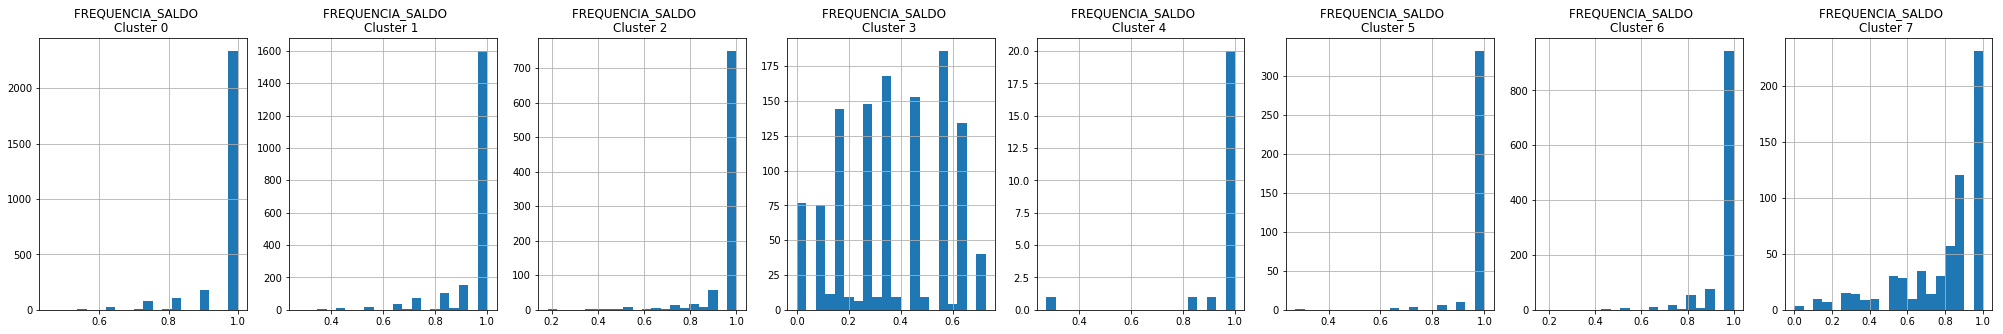

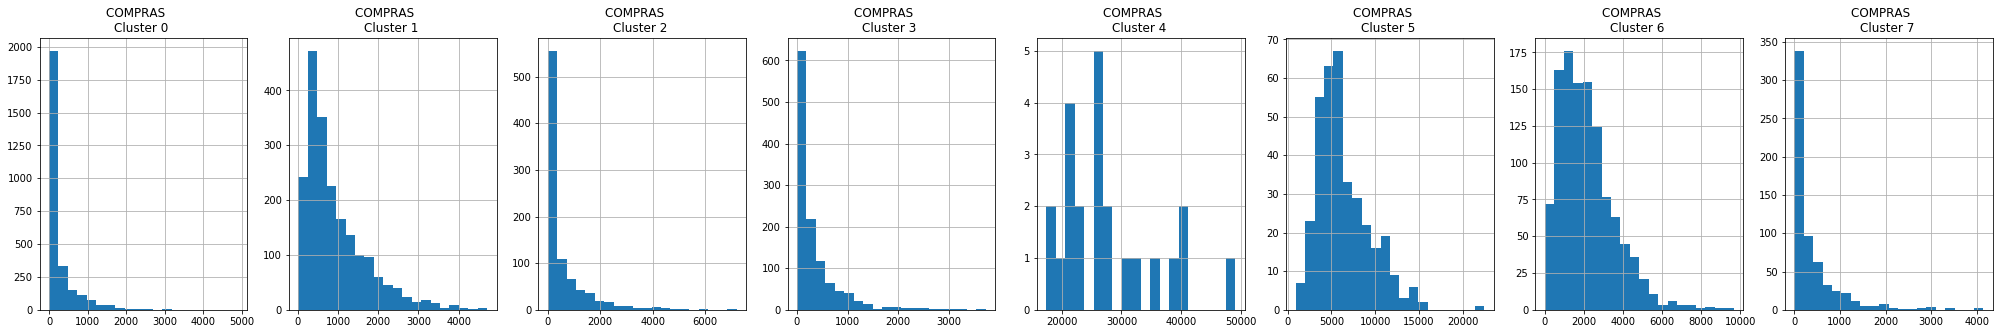

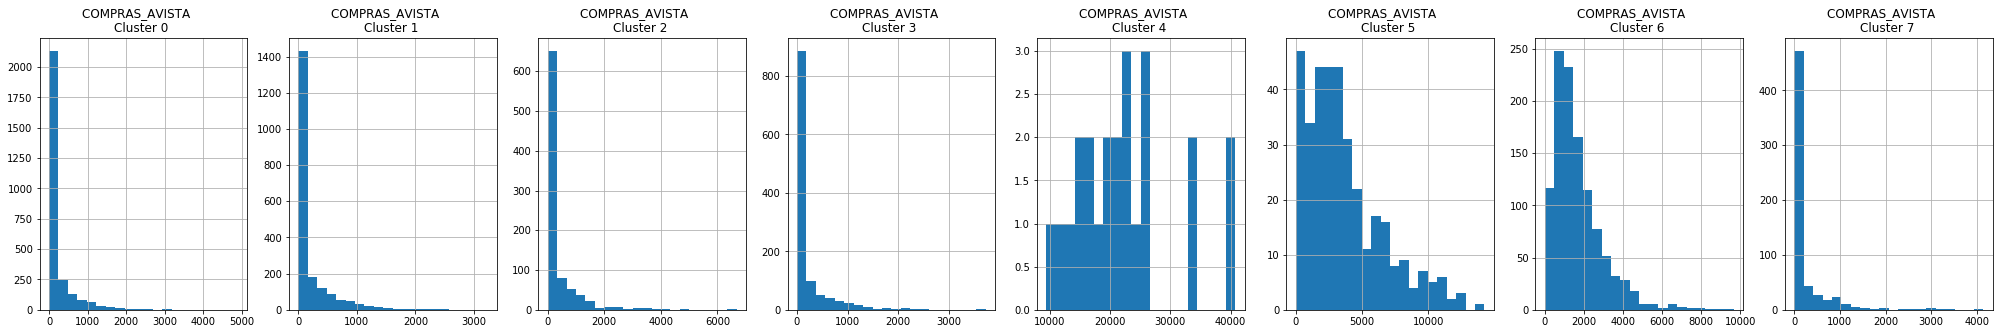

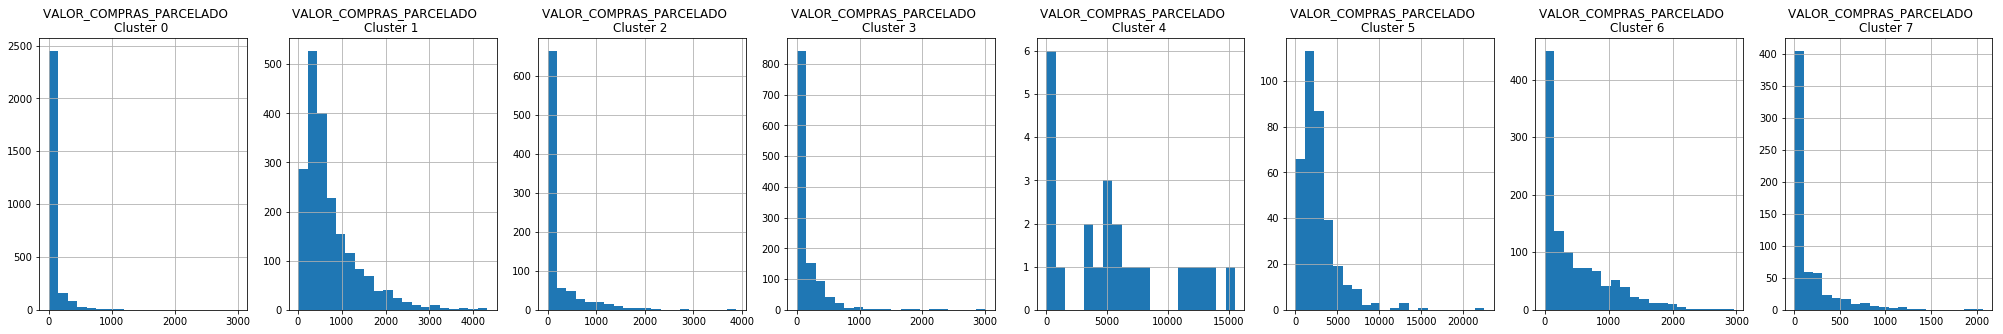

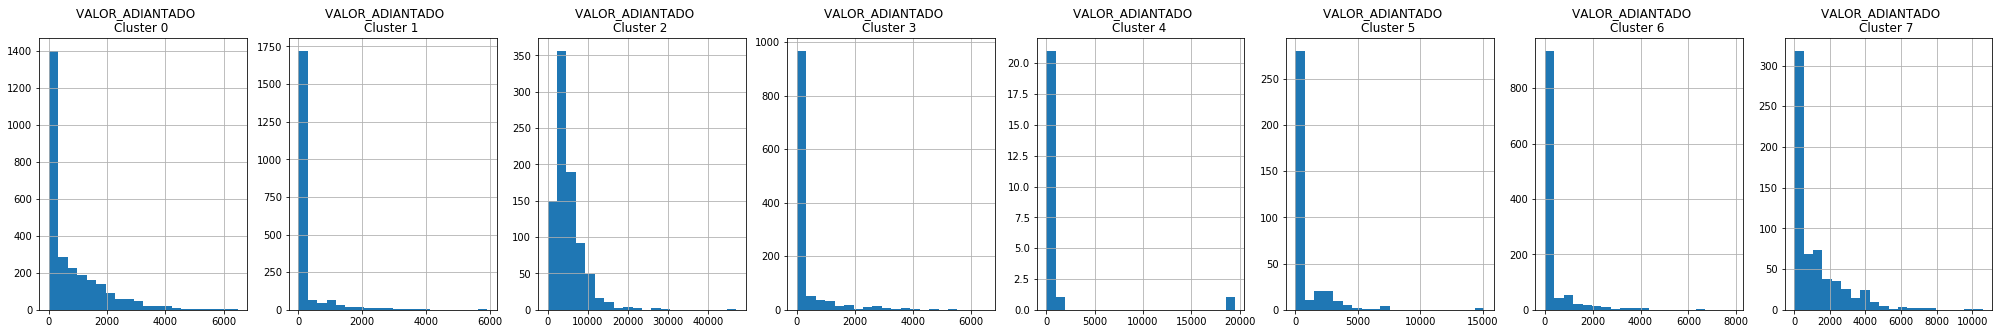

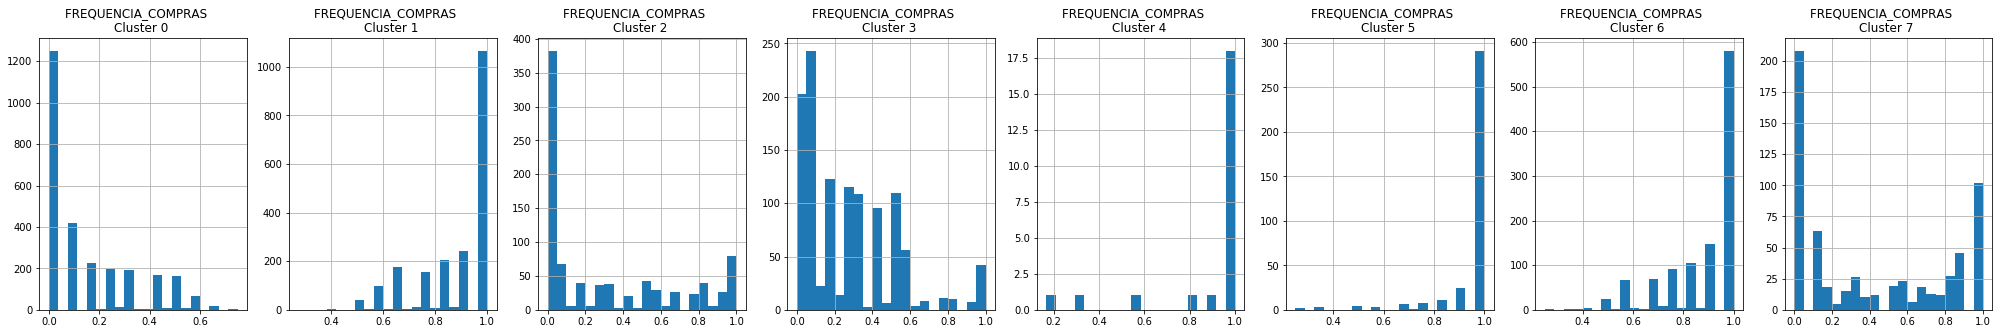

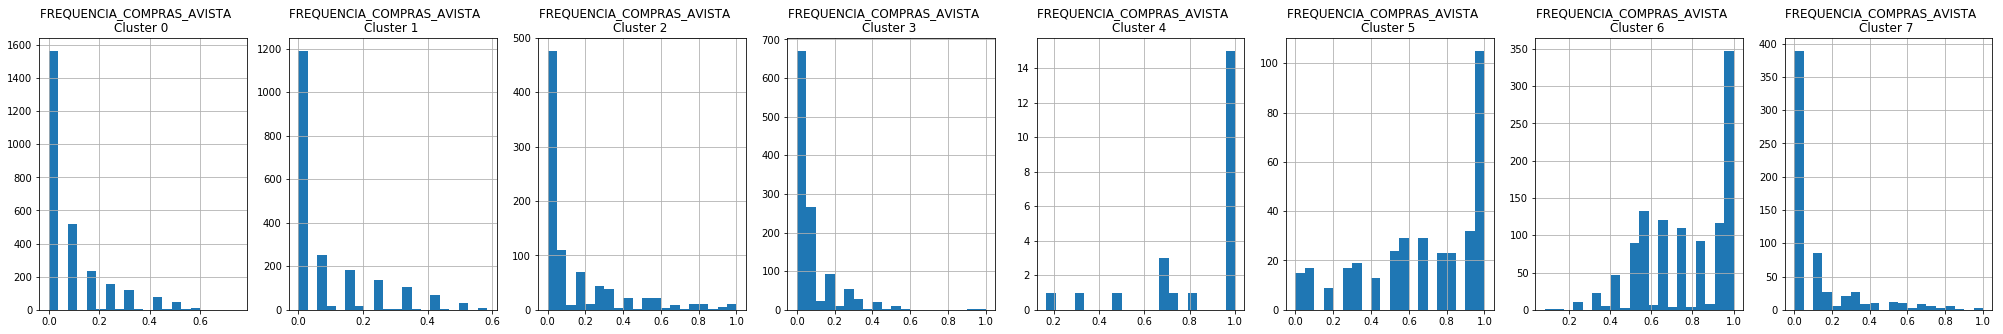

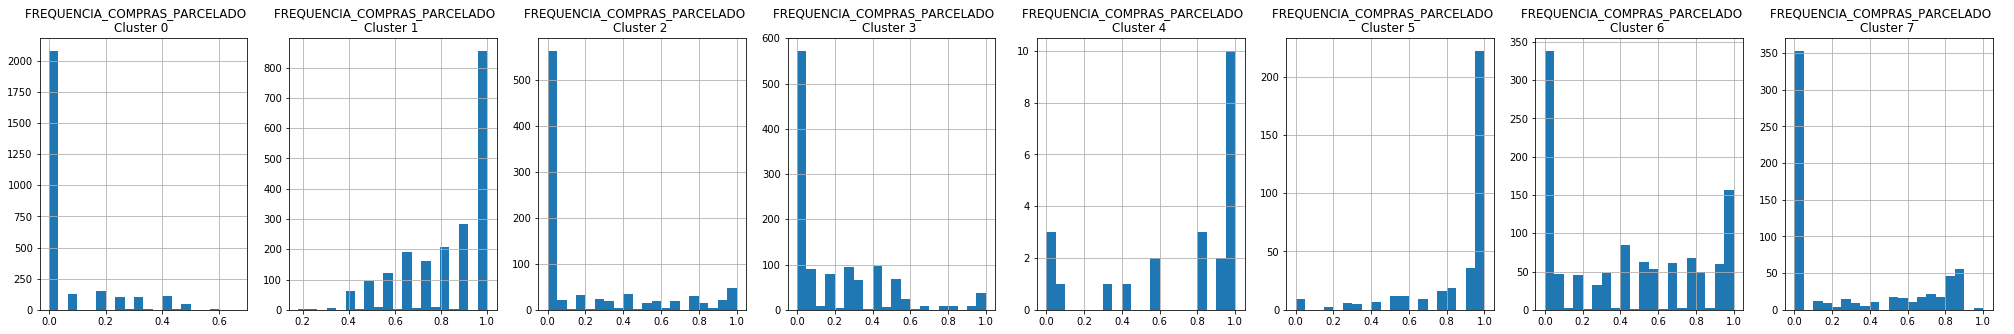

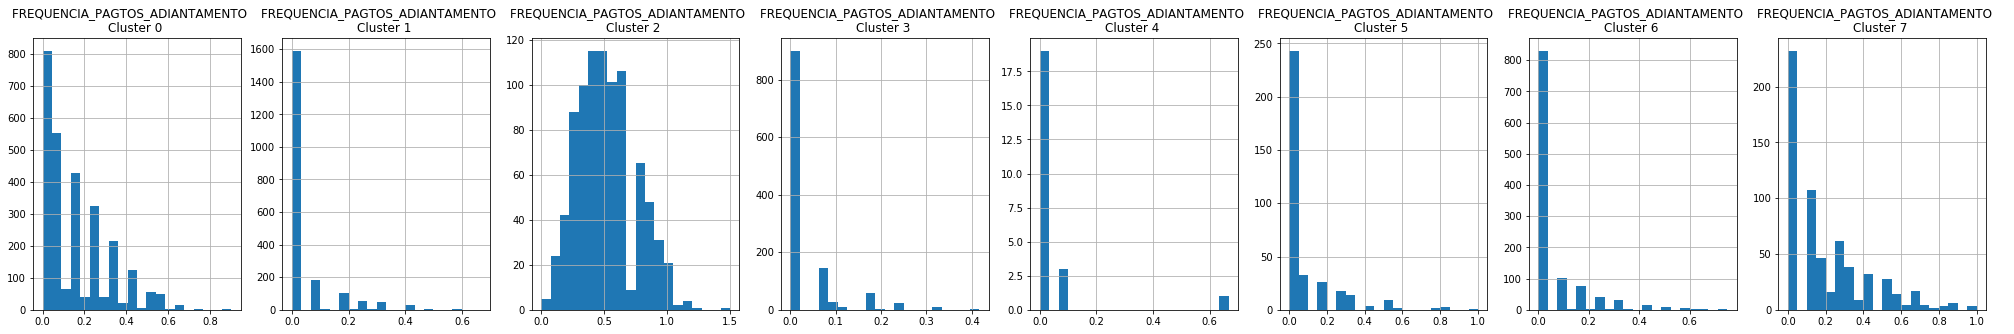

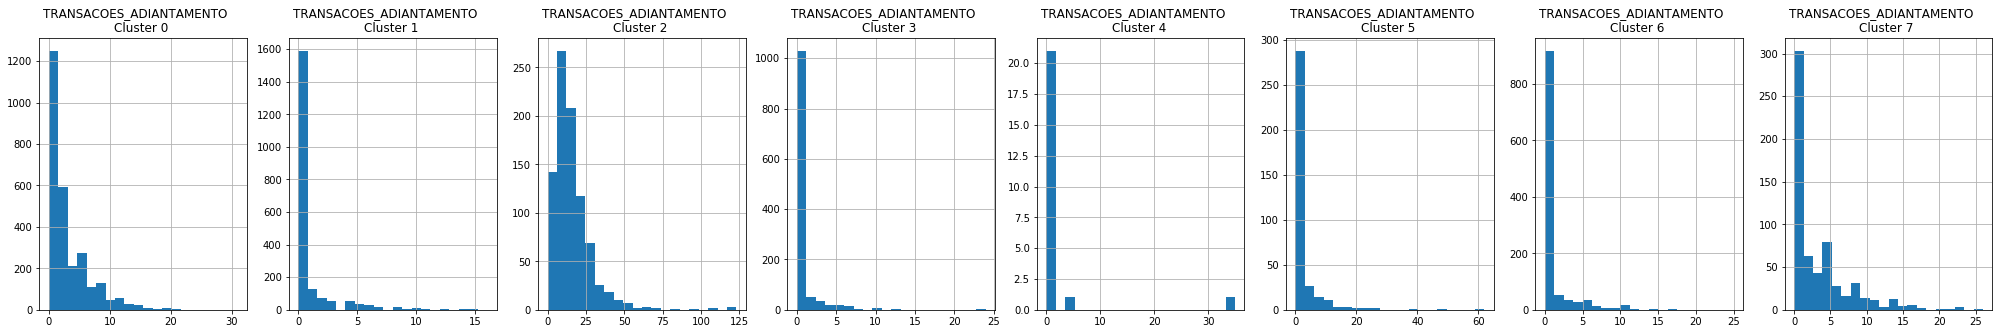

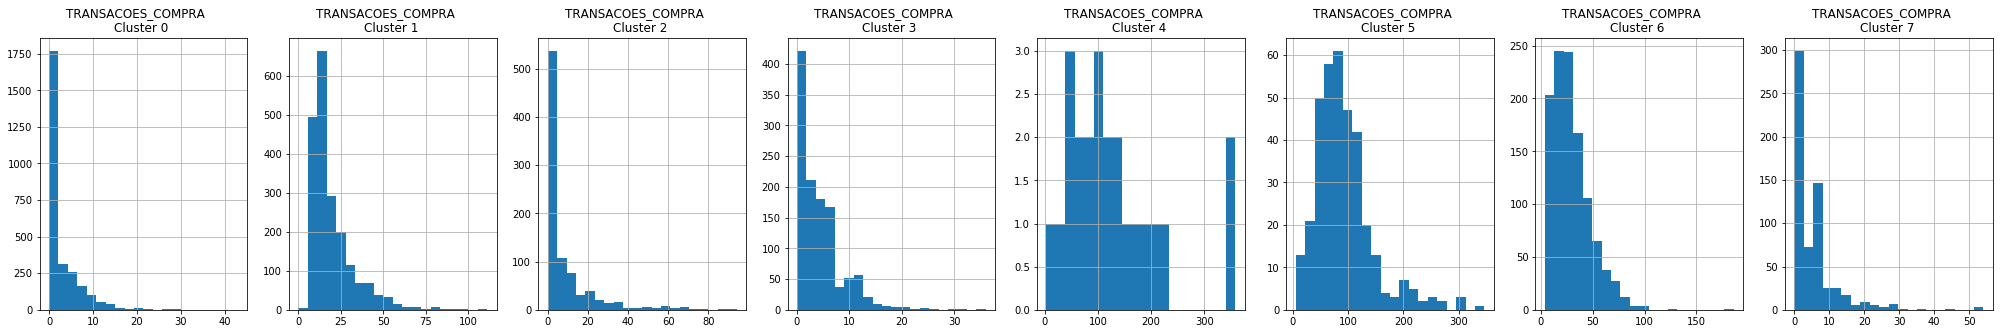

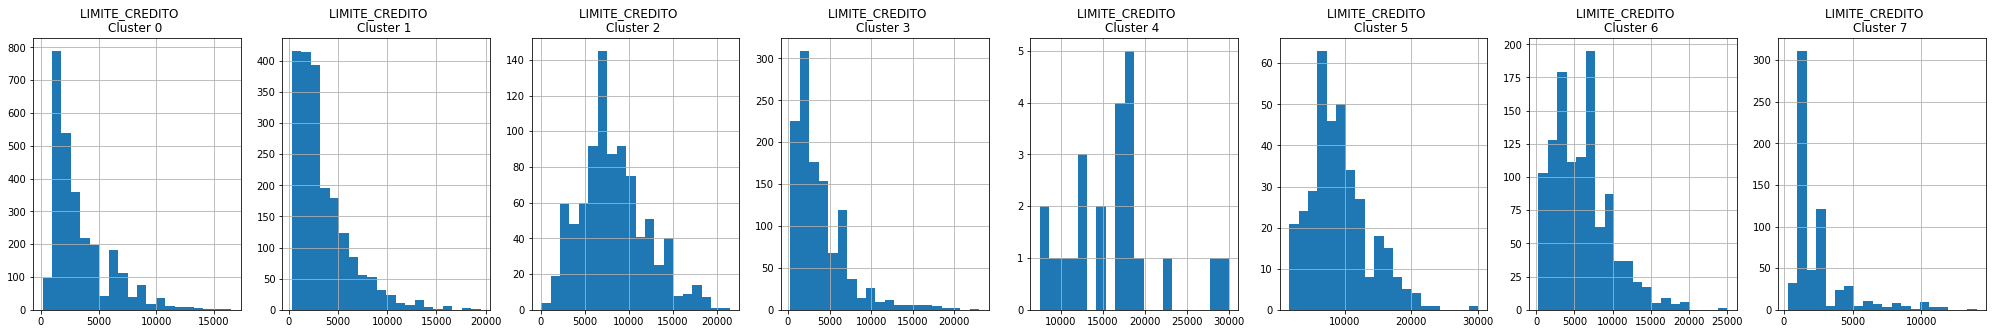

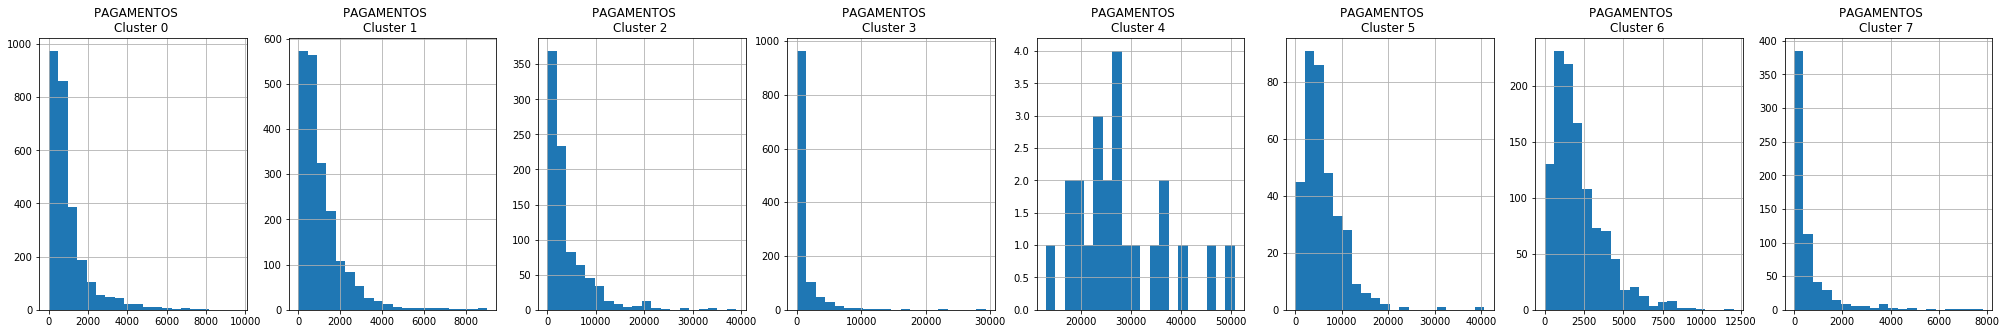

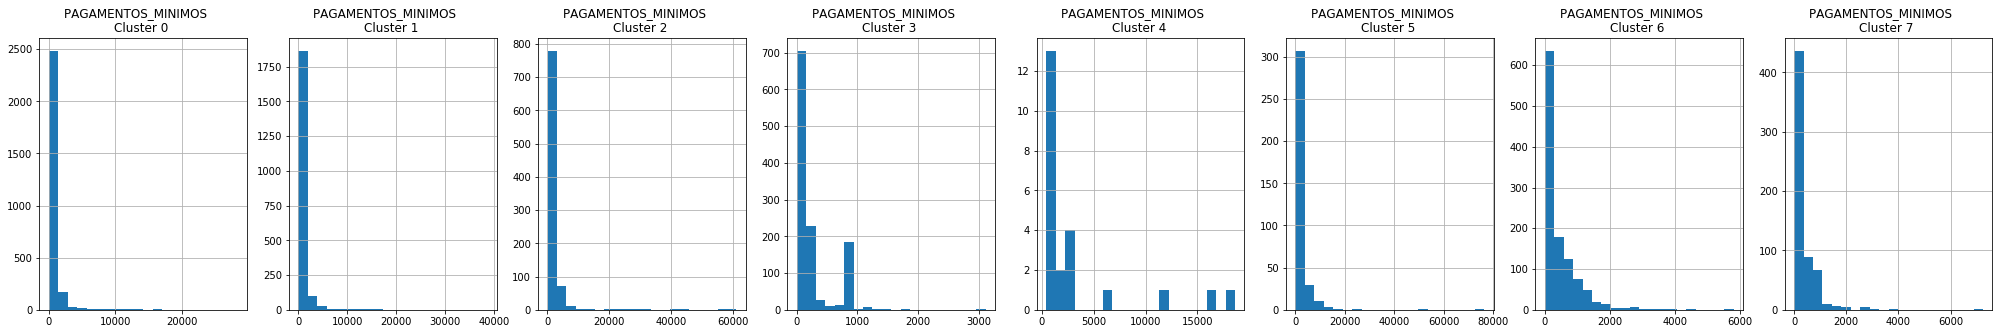

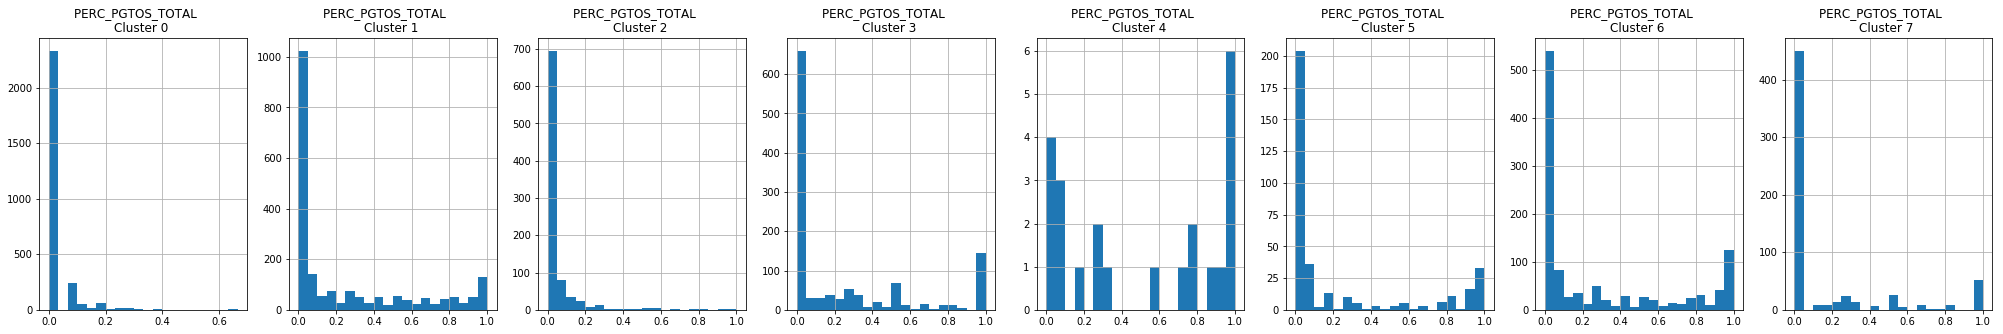

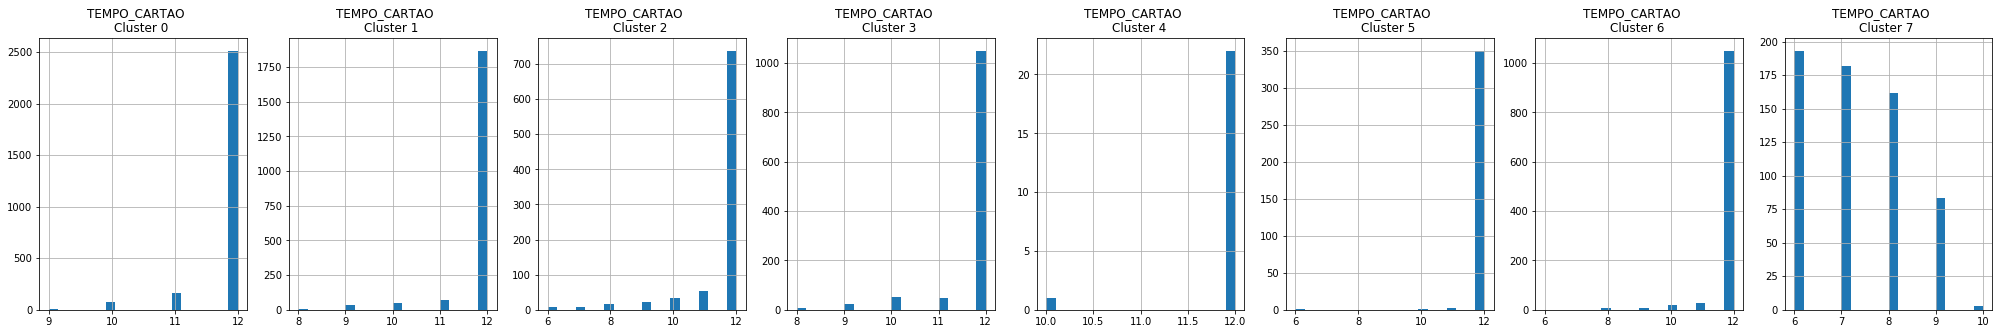

In [33]:
for i in transacoescliente_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = transacoescliente_df_cluster[transacoescliente_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

#### Aplicação do método de análise de componentes principais (PCA)

O método de análise de componentes principais conhecido pela sigla PCA em inglês, executar redução de dimensionalidade do conjunto de dados enquanto tenta manter inalterada as informações originais. O PCA estabelece um novo conjunto de features conhecido como componentes. Por sua vez, os componentes são compostos das features de entrada de dados não correlacionadas.

Formalmente o método PCA pode ser definido como um algorítmo do tipo não supervisionado.

In [34]:
# Obtendo componentes principais
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(transacoescliente_df_scaled)
principal_comp

array([[-1.68221982, -1.07644936],
       [-1.13829712,  2.5064713 ],
       [ 0.96968509, -0.38351663],
       ...,
       [-0.92620206, -1.81078163],
       [-2.33655098, -0.65796486],
       [-0.55642364, -0.40047139]])

In [35]:
# Criando dataframe com os dois componentes definidos acima
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076449
1,-1.138297,2.506471
2,0.969685,-0.383517
3,-0.873628,0.043166
4,-1.599433,-0.688578


In [36]:
# Concatenando os clusters no dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076449,0
1,-1.138297,2.506471,2
2,0.969685,-0.383517,6
3,-0.873628,0.043166,0
4,-1.599433,-0.688578,0


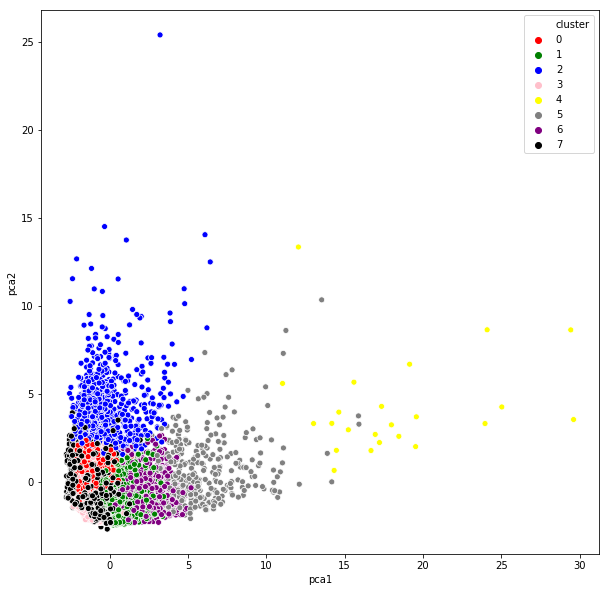

In [37]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

#### Aplicando o método autoencoders

Auto encoders é um tipo de rede neural artificial utilizada para executar compactação dos dados. Sua saída é representada pelos mesmos dados de entrada. Elas trabalham adicionando um gargalo que "força" a rede criar uma versão comprimida dos dados gerando assim redução de dimensionalidade. 

Para este projeto nós vamos obter os componentes que serão extraídos do efeito da redução de dimensionalidade ao 
aplicar o método autoencoders.


Vale lembrar que o auto encoder funciona bem quando existem correlações entre os dados, conforme identificado anteriormente. Se as features forem totalmente independentes não será possível alcançar bons resultados.

In [42]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

encoding_dim = 7

input_df = Input(shape=(17,))

#Utilização de glorot para extrair amostras de uma distribuição normal truncada
x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

#autoencoder
autoencoder = Model(input_df, decoded)

#encoder utilizado para redução de dimensionalidade
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [43]:
transacoescliente_df_scaled.shape

(8950, 17)

In [44]:
autoencoder.fit(transacoescliente_df_scaled, transacoescliente_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
8950/8950 [==============================] - 12s 1ms/sample - loss: 0.4811
Epoch 2/25
8950/8950 [==============================] - 9s 1ms/sample - loss: 0.2531
Epoch 3/25
8950/8950 [==============================] - 10s 1ms/sample - loss: 0.2028
Epoch 4/25
8950/8950 [==============================] - 10s 1ms/sample - loss: 0.1673
Epoch 5/25
8950/8950 [==============================] - 9s 1ms/sample - loss: 0.1549
Epoch 6/25
8950/8950 [==============================] - 10s 1ms/sample - loss: 0.1294
Epoch 7/25
8950/8950 [==============================] - 9s 1ms/sample - loss: 0.1206
Epoch 8/25
8950/8950 [==============================] - 10s 1ms/sample - loss: 0.1183
Epoch 9/25
8950/8950 [==============================] - 9s 1ms/sample - loss: 0.1035
Epoch 10/25
8950/8950 [==============================] - 10s 1ms/sample - loss: 0.0944
Epoch 11/25
8950/8950 [==============================] - 10s 1ms/sample - loss: 0.0903
Epoch 12

In [45]:
autoencoder.save_weights('autoencoder.h5')

In [46]:
pred = encoder.predict(transacoescliente_df_scaled)

In [47]:
pred.shape

(8950, 10)

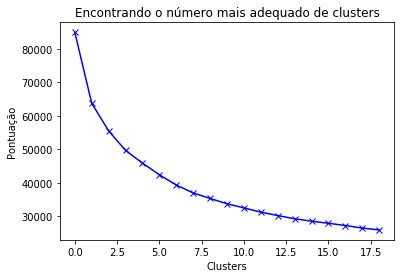

In [48]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Encontrando o número mais adequado de clusters')
plt.xlabel('Clusters')
plt.ylabel('Pontuação') 
plt.show()

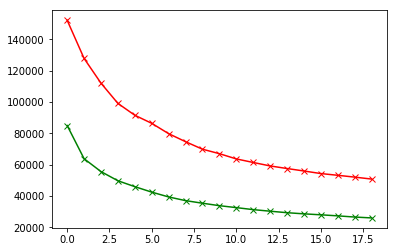

In [49]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'g')

Pode-se observar acima que no plot verde a partir do segundo cluster o cotovelo da curva começa a se formar, de modo que os valores não reduzem linearmente após 5º cluster.

Agora vamos selecionar o número 5 como o valor representante

In [50]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(transacoescliente_df_scaled)

In [51]:
df_cluster_dr = pd.concat([transacoescliente_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,SALDO,FREQUENCIA_SALDO,COMPRAS,COMPRAS_AVISTA,VALOR_COMPRAS_PARCELADO,VALOR_ADIANTADO,FREQUENCIA_COMPRAS,FREQUENCIA_COMPRAS_AVISTA,FREQUENCIA_COMPRAS_PARCELADO,FREQUENCIA_PAGTOS_ADIANTAMENTO,TRANSACOES_ADIANTAMENTO,TRANSACOES_COMPRA,LIMITE_CREDITO,PAGAMENTOS,PAGAMENTOS_MINIMOS,PERC_PGTOS_TOTAL,TEMPO_CARTAO,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [52]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.881234,-0.275316
1,-0.587477,1.696237
2,0.637281,0.049911
3,-1.194718,-0.359611
4,-1.682648,-0.110382


In [53]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.881234,-0.275316,1
1,-0.587477,1.696237,1
2,0.637281,0.049911,0
3,-1.194718,-0.359611,1
4,-1.682648,-0.110382,1


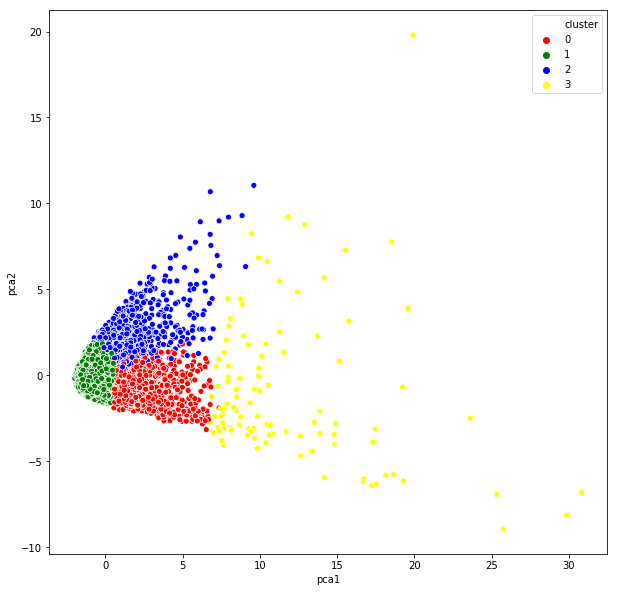

In [54]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()